# Most Popular Data Science Questions

I am working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms like Dataquest.

**I have been tasked with figuring out what is best content to write about.**

I have decided to explore the Data Science Stack Exchange (DSSE). This is a question and answer site where people can ask and answer questions about data science and is part Stack Exchange. By looking through their data I will be able to see which topics get talked about the most and are therefore the most popular. 

Stack Exchange provides a public data base for each of its websites. Here's a link to query and explore Data Science Stack Exchange's database: https://data.stackexchange.com/datascience/query/new.

Looking through the database the following columns will be useful for finding the most common posts and topics on the Data Science site.

- Id: An identification number for the post.
- PostTypeId: An identification number for the type of post.
- CreationDate: The date and time of creation of the post.
- Score: The post's score.
- ViewCount: How many times the post was viewed.
- Tags: What tags were used.
- AnswerCount: How many answers the question got (only applicable to question posts).
- FavoriteCount: How many times the question was favored (only applicable to question posts).

I have downloaded a data set which features all of these columns and every post made since 2019.

The first step is to read the Data Set into a Pandas DataFrame:

# Read Dataset into a Pandas DataFrame

In [1]:
# Import pandas
import pandas as pd
# Read Data into Dataframe
file = pd.read_csv("2019_questions.csv", parse_dates=["CreationDate"])
# View first 5 rows
file.head(5)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [2]:
# Information about Dataset
file.describe(include="all")

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
count,8839.000000,8839,8839.000000,8839.000000,8839,8839.000000,1407.000000
unique,NaN,8838,NaN,NaN,6462,NaN,NaN
top,NaN,2019-09-25 18:32:47,NaN,NaN,<machine-learning>,NaN,NaN
freq,NaN,2,NaN,NaN,118,NaN,NaN
first,NaN,2019-01-01 03:53:02,NaN,NaN,NaN,NaN,NaN
last,NaN,2019-12-31 20:18:32,NaN,NaN,NaN,NaN,NaN
mean,54724.172870,NaN,0.870687,171.548026,NaN,0.787985,1.184790
std,6507.618509,NaN,1.410255,772.813626,NaN,0.851146,0.982766
min,43363.000000,NaN,-2.000000,2.000000,NaN,0.000000,0.000000
25%,48917.500000,NaN,0.000000,22.000000,NaN,0.000000,1.000000


This data is nearly ready to go and requires only a little bit of cleaning up. I will fill the NaN values in as 0. Change the favourite count column to integer values and turn the tags column into a list of tags which I can therefore explore later on.

# Clean Data

In [3]:
# Fill Nan values
file["FavoriteCount"] = file["FavoriteCount"].fillna(0)

# Convert to Integer
file["FavoriteCount"] = file["FavoriteCount"].astype(int)

# Transform tags column into list of tags
file["Tags"] = file["Tags"].str.replace("<", "").str.replace(">", ",")
file["Tags"] = file["Tags"].str.split(",")

# Data Analysis

I'm now ready to analyse and find out the most popular topics. The tags column will be very useful for this as they tell us what the topic of each post is. let's start by taking a look at the most common tags:

Text(0.5, 0, 'Tags')

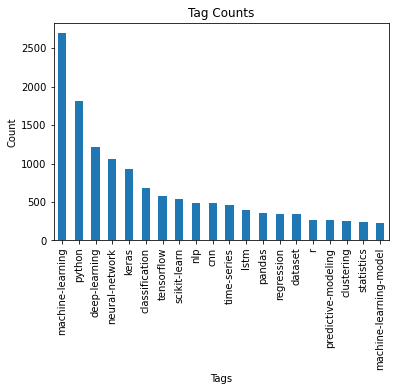

In [4]:
# Calculate number of posts for each tag
frequency = {}
for c in file["Tags"]:
    for v in c:
        if v in frequency:
            frequency[v] += 1
        else:
            frequency[v] = 1

# Transform frequencies into pandas series
frequencies = pd.Series(frequency, name="Count")
# Remove unwanted column
frequencies = frequencies.drop("")
# Sort values
frequencies = frequencies.sort_values(ascending=False)
# Filter top 20 tags
top_frequencies = frequencies[:20]
# Plot in a bar chart
ax = top_frequencies.plot.bar()
ax.set_title("Tag Counts")
ax.set_ylabel("Count")
ax.set_xlabel("Tags")

We can see from the graph above that the most popular tag is Machine learning followed by python, with deep learning, neural network and Keras all popular as well. 

Now to take a look at how many views each of the posts with these tags get. Just because there are a lot of questions involving these tags does not mean that they attract a lot of attention. 

Text(0.5, 0, 'Tags')

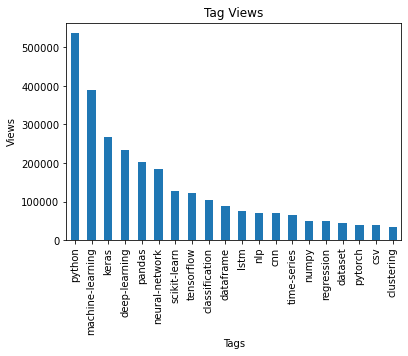

In [5]:
# Number of views for each tag
frequency_views = {}
index = 0
for c in file["Tags"]:
    for v in c:
        if v in frequency_views:
            frequency_views[v] += file["ViewCount"][index]
        else:
            frequency_views[v] = file["ViewCount"][index]
    index += 1
    
# Transform frequencies into pandas series
frequencies_views = pd.Series(frequency_views, name="Views")
# Remove unwanted column
frequencies_views = frequencies_views.drop("")
# Sort values
frequencies_views = frequencies_views.sort_values(ascending=False)
# Filter top 20 tags
top_frequencies_views = frequencies_views[:20]
# Plot in a bar chart
ax = top_frequencies_views.plot.bar()
ax.set_title("Tag Views")
ax.set_ylabel("Views")
ax.set_xlabel("Tags")

This time it is Python that is number 1 by a considerable amount. Machine-learning, Keras and Deep learning all generate a lot of views as does Pandas which has jumped up from the 13th most posts to the 5th most views. This indicates that Pandas posts must generate a lot of interest. I am now going to combine the counts and views together to see which tags generate the highest number of average views per post. 

In [6]:
# Merge frequency series together
merged_frequencies = pd.merge(top_frequencies, top_frequencies_views, how="inner", left_index=True, right_index=True)
merged_frequencies

,Count,Views
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608
classification,685,104457
tensorflow,584,121369
scikit-learn,540,128110
nlp,493,71382
cnn,489,70349


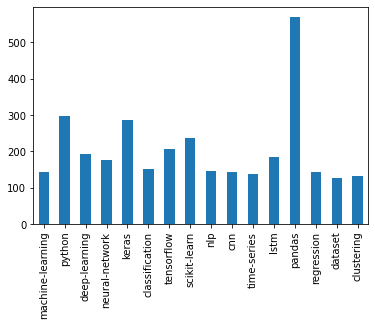

In [7]:
# Plot bar Chart
merged_frequencies["Average"] = merged_frequencies["Views"] / merged_frequencies["Count"]
merged_frequencies["Average"].plot.bar()

As suspected from the 2 charts above pandas generates by far the most views per post. Almost double any of the others! Other tags which generate a lot of views per post are python and Keras.


Through this analysis there are a few tags which keep popping up as being very popular- machine leanring, python, deep learning, neural-network, keras and pandas. 

Pandas is a module of Python and the 2 are obviously linked. So my first suggestion for Data Science content would involve a lot of Python. The other popular tags are all connected to deep learning.

Before deciding that these are my recommendations I want to check that they have been popular over a long period of time and that deep learning isn't just a fad. Remeber that my data was taken only from 2019. I am now going to check that these tags have been popular over numerous years by generating a dataset encompassing the years 2014 - 2019.

# Check Popularity Over time

I am going to read the dataset into pandas and do the same cleaning as I did for the 2019 dataset. I will then create a column that gives the year of each post so that I can group by the year later on>

In [8]:
# Read data into pandas dataframe
all_years = pd.read_csv("all_questions.csv", parse_dates=["CreationDate"])

# Transform tags column into list of tags
all_years["Tags"] = all_years["Tags"].str.replace("<", "").str.replace(">", ",")
all_years["Tags"] = all_years["Tags"].str.split(",")

# Create year column
import datetime as dt
all_years["year"] = all_years["CreationDate"].dt.strftime("%Y")
all_years["year"] = all_years["year"].astype(int)

I am now going to add 2 more columns. One for if the tags include one of the popular deep learning topics that we discovered from the 2019 data and another if the tags include either Python or Pandas

In [9]:
# Function to find Deep learning tags
def find_deep(value):
    deep_learning = ["machine-learning", "neural-network", "deep-learning", "keras", "scikit-learn", "tensorflow"]
    for d in deep_learning:
        if d in value:
            return True

# Apply function
all_years["Deep_learning"] = all_years["Tags"].apply(find_deep)

# Function to find Python tags
def find_python(value):
    python = ["python", "pandas"]
    for p in python:
        if p in value:
            return True

# Apply Function
all_years["Python"] = all_years["Tags"].apply(find_python)

# Filter out incomplete 2020 data
all_years = all_years[all_years["year"] < 2020]
# Show Dataset wiht new columns
all_years

,Id,CreationDate,Tags,year,Deep_learning,Python
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability, ]",2019,True,True
1,45418,2019-02-12 00:50:39,"[neural-network, ]",2019,True,None
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot, ]",2019,None,True
3,45426,2019-02-12 04:51:49,"[keras, ]",2019,True,None
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",2019,None,None
...,...,...,...,...,...,...
21571,36971,2018-08-15 14:19:01,"[statistics, data, ]",2018,None,None
21572,36974,2018-08-15 14:40:27,"[machine-learning, neural-network, classifier, ]",2018,True,None
21573,36975,2018-08-15 14:53:43,"[machine-learning, classification, ]",2018,True,None
21574,36979,2018-08-14 19:31:43,"[tensorflow, python, ]",2018,True,True


Now that I have the data that I need I can plot it into 2 bar charts. The first will show the number of posts with deep learning tags each year from 2014 to 2019. The second will show the same but for posts with either Python or Pandas tagged. If we see consistent popularity over time or a continuing increase over time then I will be happy to recommend the 2 topics to the Data Science Content company.

Text(0.5, 0, 'Year')

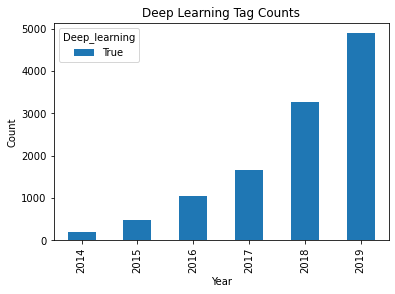

In [10]:
# Plot Deep learning popularity over time
deep_by_years = all_years.pivot_table(index="year", columns="Deep_learning", aggfunc="size")
ax_1 = deep_by_years.plot.bar()
ax_1.set_title("Deep Learning Tag Counts")
ax_1.set_ylabel("Count")
ax_1.set_xlabel("Year")

Text(0.5, 0, 'Year')

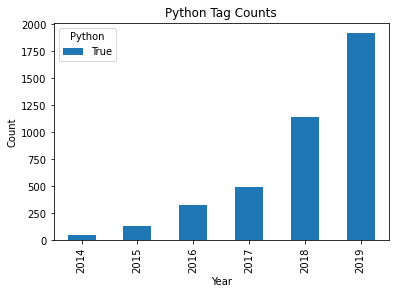

In [11]:
# Plot Python Popularity over time
python_by_years = all_years.pivot_table(index="year", columns="Python", aggfunc="size")
ax_2 = python_by_years.plot.bar()
ax_2.set_title("Python Tag Counts")
ax_2.set_ylabel("Count")
ax_2.set_xlabel("Year")

# Conclusion

These 2 charts show that the popularity of both deep learning and python have increased each year from 2014 onwards. We do not have to fear that the 2019 data was an annomoly or that deep learning is just a fad.

**I am happy to recommend 2 topics for the Data Science Content company. Deep Learning and Python. These were the 2 most popular topics from 2019 and have been shown to be increasing in popularity each year from 2014 onwards.** 